In [147]:
# IMPORT DEPENDENCIES
# FOR DATA
import pandas as pd
import os
import csv
import math
import numpy as np
import time
import datetime
from datetime import datetime
# import requests
# import datefinder

# # FOR SQL LITE
# from sqlalchemy import create_engine
# from datetime import date

# FOR PLOTTING
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8

# FOR MODELING
from scipy.optimize import curve_fit
# from splinter import Browser
# from bs4 import BeautifulSoup as BS
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification


# IMPORT DATA

In [148]:
# File path for the CSV Files
idahoFireWeatherDrought = os.path.join("..", "Data", "fires_Idaho_2000_2015_drought_weather.csv")

# Open the CSV Files, Convert to a Dataframe, and Save as a Variable
idaho_Fire_Weather_Drought_df = pd.read_csv(idahoFireWeatherDrought)
# fires_Idaho_df = pd.read_csv(idahoFires, dtype={"LOCAL_INCIDENT_ID": 'string', "FIRE_NAME": 'string'})

In [149]:
# Convert date to datetime format
idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'])
idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'])
# pd.to_datetime(ID_city_wthr_df_new_datetime[‘time_daily’])
# View the Data in the Dataframe
# print(idaho_Fire_Weather_df.keys())
idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'].dtype

dtype('<M8[ns]')

In [150]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [97]:
# Get Avg for values
Day1_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].mean()
Day2_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].mean()
Day3_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].mean()
Day4_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].mean()
Day1_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].mean()
Day2_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].mean()
Day3_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].mean()
Day4_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].mean()

# Use Avg values to fill any null values
idaho_Fire_Weather_Drought_df['DAY_PRCP_1'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].fillna(Day1_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_2'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].fillna(Day2_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_3'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].fillna(Day3_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_4'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].fillna(Day4_prcp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].fillna(Day1_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].fillna(Day2_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].fillna(Day3_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].fillna(Day4_temp)

In [98]:
# I'm intentionally not looking at "LoanAmount", because I don't want to print out every possible loan value
contains_null = ['LATITUDE', 'LONGITUDE', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
                                   'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']

# for col in contains_null:
#     print(f"List of unique labels for {col}:::{set(idaho_Fire_Weather_Drought_df[col])}")

In [99]:
# # Get dummy variables for nominal property column
# # idaho_Fire_Weather_df = pd.get_dummies(idaho_Fire_Weather_df, columns=["FIRE_SIZE_CLASS"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["CITY"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["NAME"])

# # FIRE_SIZE_CLASS_NOS  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}

# # # replace values in each column according to the dictionaries above
# # clean_fires_Idaho_2000_2015_df.replace({'FIRE_SIZE_CLASS': FIRE_SIZE_CLASS_NOS}, inplace=True) 
                    
# idaho_Fire_Weather_Drought_df.isnull().sum()

# MODELING

## CREATING A KNN NETWORK MODEL

In [100]:
idaho_Fire_Weather_Drought_df.count()

Unnamed: 0        15487
OBJECTID          15487
Shape             15487
Join_Count        15487
TARGET_FID        15487
                  ...  
DAY_PRCP_4        15487
DAY_AVG_TEMP_1    15487
DAY_AVG_TEMP_2    15487
DAY_AVG_TEMP_3    15487
DAY_AVG_TEMP_4    15487
Length: 116, dtype: int64

In [135]:
# CREATE X VALUES
# X by Keep
X = idaho_Fire_Weather_Drought_df[['DAY3', 'LATITUDE', 'LONGITUDE', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
                                   'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# X by drop
# X = idaho_Fire_Weather_df.drop(['FIRE_SIZE_CLASS', 'DISCOVERY_DATE_CONVERTED'], axis=1)

print(X.keys())
X = X.values.reshape(-1, 21)

# X = X.to_numpy()

print(X.shape)
type(X)
X

# fires_Idaho_2000_2015_df

Index(['DAY3', 'LATITUDE', 'LONGITUDE', 'AVE_FAM_SZ', 'NO_FARMS12',
       'AVE_SIZE12', 'CROP_ACR12', 'None', 'D0', 'D1', 'D2', 'D3', 'D4',
       'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4',
       'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4'],
      dtype='object')
(15487, 21)


array([['2005-07-15', 44.48861111, -111.25611111, ..., 69.08000000000001,
        69.98, 71.06],
       ['2005-07-01', 42.73638889, -112.38444444, ..., 62.06,
        69.08000000000001, 66.92],
       ['2005-07-03', 42.83972222, -112.17666667, ..., 66.92,
        64.03999999999999, 64.94],
       ...,
       ['2015-10-11', 48.58927051, -116.39294170000001, ...,
        66.74000000000001, 59.36, 50.0],
       ['2015-10-13', 44.49186207, -116.0888318, ..., 58.46, 61.52,
        63.68000000000001],
       ['2015-10-16', 48.63620768, -116.4743172, ..., 51.8, 53.06,
        55.40000000000001]], dtype=object)

In [102]:
# CREATE y VALUES
y = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS']]
# y = idaho_Fire_Weather_Drought_df[['STAT_CAUSE_DESCR', 'FIRE_SIZE_CLASS']]

# y = y.values.reshape(-1, 2)

# print(y.shape)
# # type(y)
# y

# LABEL ENCODE Y
# Import required module
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
le = LabelEncoder()

# Create an object of the label encoder class
labelencoder = LabelEncoder()

# apply "le.fit_transform"
old_y = y.apply(le.fit_transform)
y = old_y

# # Change the shape of y v1
new_y = np.array(old_y)
y = new_y.reshape(-1, 1) 

y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [103]:
# numpy.arange(10000)

In [104]:
# Split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [105]:
# # Scale your data
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# # y_scaler = StandardScaler().fit(y_train)

# # Create variables to hold the scaled train & test data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# # y_train_scaled = y_scaler.transform(y_train)
# # y_test_scaled = y_scaler.transform(y_test)

In [106]:
### Encode the categorical target variable to the necessary format for the model
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

### Create 2 neural network with 1 hidden layer and 2 hidden layers

In [107]:
# Inputs
X_train.shape

(11615, 20)

In [108]:
# Inputs
y_train_categorical.shape

(11615, 7)

In [109]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []

k_range = range(1, 20, 2)

for k in k_range:
    # create the classifier for each value of K
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train_categorical)
    
    #Score with both test and train data
    train_score = knn.score(X_train, y_train_categorical)
    test_score = knn.score(X_test, y_test_categorical)
    
    #append the scores to our list of scores
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.999/0.462
k: 3, Train/Test Score: 0.630/0.442
k: 5, Train/Test Score: 0.545/0.430
k: 7, Train/Test Score: 0.508/0.421
k: 9, Train/Test Score: 0.489/0.421
k: 11, Train/Test Score: 0.479/0.417
k: 13, Train/Test Score: 0.467/0.413
k: 15, Train/Test Score: 0.455/0.408
k: 17, Train/Test Score: 0.451/0.414
k: 19, Train/Test Score: 0.447/0.409


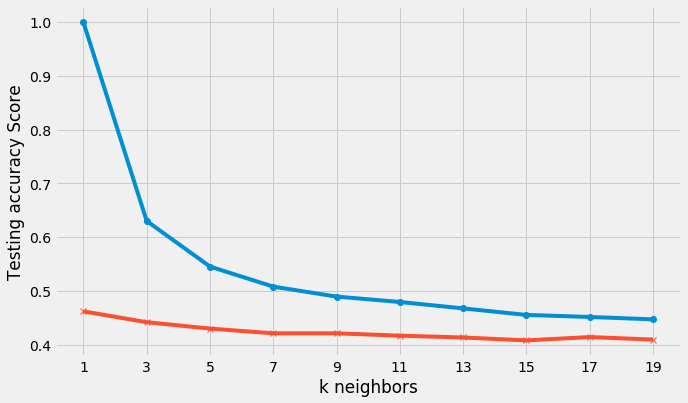

In [110]:
plt.figure(figsize=(10,6))

plt.plot(k_range, train_scores, marker='o')

plt.plot(k_range, test_scores, marker="x")

plt.xticks(k_range)

plt.xlabel("k neighbors")

plt.ylabel("Testing accuracy Score")

plt.show()

In [133]:

knn_model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
              }

grid = GridSearchCV(knn_model, param_grid, verbose=-1, scoring='f1_micro', cv = 3)
# 'average' : [None, 'micro', 'macro', 'weighted', 'samples']
# f1_score(y_true, y_pred, average='weighted')

In [134]:
grid.fit(X_train, y_train_categorical)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ZeroDivisionError: integer division or modulo by zero

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Model02_knnModel.sav'
joblib.dump(knn_model, filename)

In [ ]:
fire_model_v1, fire_model_v1 = fire_model_v1.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

fire_model_v2, fire_model_v2 = fire_model_v2.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")